In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import check_lab03 as p

In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3
pi=np.pi

# ME 3263 Introduction to Sensors and Data Analysis

## Lab #3 Measuring Natural Frequencies


### What are natural frequencies

In free vibration (i.e., no external forcing), structural components
oscillate at specified frequencies or combinations of frequencies. Since
these vibrations are unforced, the associated frequencies are referred
to as natural frequencies; it's how the system vibrates if left to
behave on its own. In contrast, driven linear systems vibrate at the
driving frequency. An amplification of the response (called resonance)
occurs when the driving frequency coincides with one of the natural
frequencies. In short, the system is driven at a frequency at which it
likes to vibrate. Large amplitude oscillations are the result. So it is
important to know what the natural frequencies are *a priori* so you can
avoid driving the system into resonance.

In lab 2, we used the Euler-Bernoulli beam equation to describe static deflection of a cantilever beam. Here, we will use the Euler-Lagrange dynamic beam equation to account for inertial effects. The Euler-Lagrange beam equation relates bending stiffness and density as such

$\frac{\partial^2}{\partial x^2}\left(EI\frac{\partial^2 w}{\partial
x^2}\right)=-\mu\frac{\partial^2 w}{\partial^2 t} +q(x)$  (1)

where $E$ is the Young's modulus of the beam, $I$ is the second moment of area of the beam's cross-section, $\mu$ is the mass per unit length of the beam, $q(x)$ is the applied load, and $w=w(x,t)$ is the displacement of the neutral axis that is a function of $x$-distance along beam-and $t$-time. 

Calculating the natural frequencies ignores the applied load $q(x)$ and if the cross-section is constant, Equation 1 becomes

$EI\frac{\partial^4 w}{\partial
x^4}=-\mu\frac{\partial^2 w}{\partial^2 t}$.  (2)

The full solution requires evaluation of the partial differential equation. We will use the derived mode shapes and natural frequencies for a cantilever beam [\[1\]](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory#Example:_Cantilevered_beam). The solution for $w(x,t)$ is as such

$w(x,t)=\sum_{n=1}^{\infty}(A_{n}\cos\omega_{n}t+B_{n}\sin\omega_{n}t)
\left(\cosh\beta_n x-\cos\beta_n x+
\frac{\cos\beta_n L + \cosh\beta_n L}{\sin\beta_n L+\sinh\beta_n L}
\left(\sin\beta_n x -\sinh\beta_n x\right)\right)$   (3)

where the formula $\cosh(\beta_n L)\cos(\beta_n L) +1 =0$ defines the constants $\beta_n$, $L$ is the length of the beam, and $A_n$ and $B_n$ are constants derived from initial conditions. In the experiment, you will deliver an impulse to the cantilever specimens. An impulse will only require $\sin(t)$ components, so $A_n$=0 for all n. The beam will vibrate similar to the following video [Beam vibrations](https://photos.app.goo.gl/t5a79MEz7PrM9vhf7). 

### Measuring natural frequencies

In this lab, you will measure the first 3 natural frequencies of a rectangular beam using strain gage data processed with a [fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform). 
Your goal is 
to measure the free response time series data using a strain gage. With this data, you will
determine the first natural frequency in two ways: (i) by peak counting in the
time domain (which gives a very rough estimate of $\omega_n$); and (ii) by a
formal frequency domain analysis (fast Fourier transform or FFT). For the
rectangular beam, you have analytical expressions for the natural frequencies
and you can confirm that you're doing everything properly by getting the
analytical frequencies to agree with the experimental frequencies.

Measuring vibrational modes has two components, the frequency and the amplitude. The amplitude of vibration can be determined by taking the difference between the maximum and minimum measurements. Measuring the frequency requires more attention. Consider 10 oscillations of a cos-wave of 1-Hz with amplitude of 1 a.u. (aribitrary units). Now, take N measurements over the given timeframe from 0-10 seconds. 

Text(0, 0.5, 'a.u.')

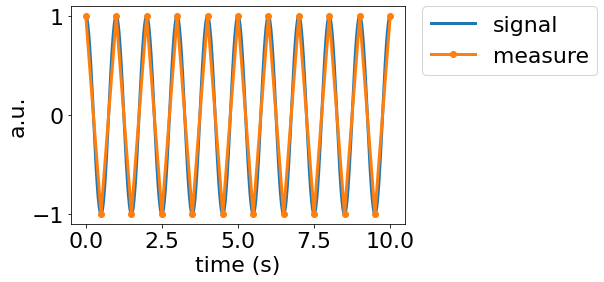

In [3]:
N=20
t_collect=10 # time to collect data
t=np.linspace(0,t_collect,1000)
y=np.cos(2*pi*t)
tsample=np.linspace(0,10,N+1)
ysample=np.cos(2*pi*tsample)
plt.figure(20)
plt.plot(t,y,label='signal')
plt.plot(tsample,ysample,'o-',label='measure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time (s)')
plt.ylabel('a.u.')

For N=20, it would appear that we can capture a minimal example of our signal (just the peaks occuring at 1 Hz). Collecting data for N=20 over 10 seconds is equivalent to sampling at 20 samples/10 seconds = 2 Hz. This is called the Nyquist rate which is given as such

$f_{Nyquist}=2f_{signal}$. (4)

In Equation 4, the Nyquist rate (also Shannon Sampling) [\[2\]](./jerri_1977-shannon_sampling.pdf)[\[3\]](./nyquist.pdf), $f_{Nyquist}$, is the minimum sampling rate necessary to capture the signal at frequency, $f_{signal}$. Try changing N<20 and consider the apparent signal frequencies. 

If you try N=11 in the Python code below, you will see a phenomenon called "aliasing" or the "wagon-wheel effect" [\[3\]](http://www.onmyphd.com/?p=aliasing). When you look at the measured signal, it appears to have a frequency of 1 cycle/10 seconds = 0.1 Hz. This phenomenon is called the wagon-wheel effect because it is noticeable when recording spinning objects like a wagon wheel [or turbine](https://www.youtube.com/watch?v=vIsS4TP73AU). The wheel spins at a given frequency and the camera records at another frequency. When the ratio of the wheel frequency to camera recording frequency reaches certain values the wheel appears to stop, spin slower, or even backwards. 

Text(0, 0.5, 'a.u.')

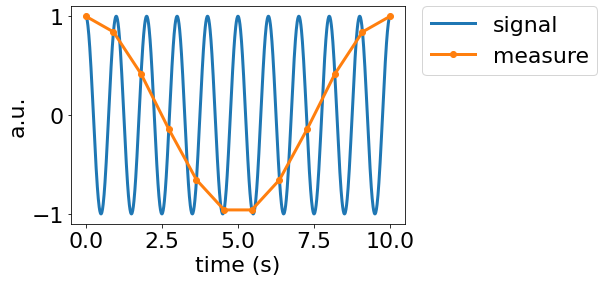

In [4]:
N=11
t_collect=10 # time to collect data
t=np.linspace(0,t_collect,1000)
y=np.cos(2*pi*t)
tsample=np.linspace(0,10,N+1)
ysample=np.cos(2*pi*tsample)
plt.figure(20)
plt.plot(t,y,label='signal')
plt.plot(tsample,ysample,'o-',label='measure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time (s)')
plt.ylabel('a.u.')

Experimentally, we avoid aliasing by sampling above the Nyquist rate from equation 4. This poses a chicken and the egg problem. In order to measure the frequency, we need to  double the measured frequency and measure the frequency. The result is that we cannot trust measured frequencies below half of the sampling frequency. We use a method called the fast Fourier transform to compare amplitudes measured at different frequencies.

The fast Fourier transform (FFT) is a numerical implementation of the Fourier transform [\[4\]](./cooley_and_tukey-FFT.pdf). A Fourier transform of the function introduced earlier, $\cos(2\pi t)$, is two dirac delta functions at 1 Hz and -1 Hz. The FFT, if the sampling is well above the Nyquist rate, will produce two peaks, one at 1 Hz and another at the $f_{sampling} - 1Hz$, where $f_{sampling}$ is the sampling frequency. The signal is produced in the previous example with 1000 data points using `linspace(0,10,1000)`. In the next block of code we can compare different numbers of data points collected and the effect on the FFT results. 

(0.0, 5.0)

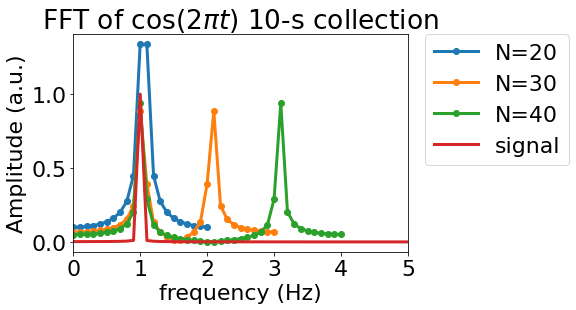

In [5]:
Y    = 2/1000*np.fft.fft(y)
freq = np.linspace(0,1000/t_collect,len(Y))
plt.figure()
for N in range(20,50,10):
    tsample=np.linspace(0,10,N+1)
    ysample=np.cos(2*pi*tsample)
    Ysample= 2/N*np.fft.fft(ysample)
    freqsample = np.linspace(0,N/t_collect,len(Ysample))

    plt.plot(freqsample, np.abs(Ysample),'o-',label='N=%i'%N)
plt.plot(freq, np.abs(Y) ,label='signal')
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude (a.u.)')
plt.title(r'FFT of $\cos(2\pi t)$ 10-s collection')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim((0,5))

In the figure plotted above, for N=20, $f_{sampling}=20/10~s=2~Hz$, for N=30, $f_{sampling}=30/10~s=3~Hz$, for N=40, $f_{sampling}=40/10~s=4~Hz$. The Nyquist rate is $2~Hz$. For each sampling rate above the Nyquist rate we see two peaks, $1~Hz$ and $f_{sampling}-1~Hz$. As a rule of thumb, do not trust any peaks you find above $f_{sampling}/2$. The FFT calculation produces the same amplitude in either direction from the point $f_{sampling}/2$. 

# Problem 1

Take the Fourier transform of a function $\sin(2\pi t)$ recorded for 10 seconds. Plot the results for:

a. N=20

b. N=30

c. N=40

*Hint: use the same code from above [click here for answer](https://photos.app.goo.gl/QE2wM6Ur24cCtaiX8)*

### Part 1 - Rectangular beam dynamics

Use the physical dimensions of your beam and calculated modulus from Lab #1. Calculate the first
three natural frequencies of a cantilever beam using the formula

$\omega_i=\beta_i^2\sqrt{\frac{EI}{\bar{m}L^4}}$ (5)

where the $i^{th}$ natural frequency, $\omega_i$ is given in
rad/s, $\beta_1=1.875104$, $\beta_2=4.694091$, $\beta_3=7.854757$, $\bar{m}$ is
the mass per unit length, $E$ is Young's modulus, and $I$ is the second moment
of area of the beam. Ensure that the units of $\omega_i$ are rad/s e.g. 1/s.

As an example, the function `natural_frequency(i,E,I,mbar,L)` returns the $i^{th}$ natural frequency of a cantilever beam given 
    Youngs modulus, `E`,second moment of area, `I`, mass per unit length, `mbar`=density*(cross-sectional area), and Length, `L`. An example for aluminum is given with a cross-section of $12\times4$ mm in the cell following the function definition.

In [6]:
def natural_frequency(i,E,I,mbar,L):
    '''returns the i^th natural frequency of a cantilever beam with 
    Youngs modulus, E 
    second moment of area, I
    mass per unit length, mbar=density*(cross-sectional area)
    Length, L'''
    # solutions to cosh(pi*x)*cos(pi*x)+1=0 are saved in beta array below
    # first 19 mode shapes are solved
    beta=np.array([ 1.87510407,  4.69409113,  7.85475744, 10.99554073,
                   14.13716839, 17.27875953, 20.42035225, 23.5619449 ,
                   26.70353756, 29.84513021, 32.98672286, 36.12831552,
                   39.26990817, 42.41150082, 45.55309348, 48.69468613, 
                   51.83627878, 54.97787144, 58.11946409])
    if i>len(beta):
        print('Error: choose a natural frequency less than %i'%(len(beta)))
        omega=np.NaN
    else:
        omega=beta[i-1]**2*np.sqrt(E*I/(mbar*L**4))
    return omega


In [7]:
E=200E9 # 200,000,000 Pa=70 GPa
b=4e-3 # width in m
h=4e-3 # thickness in m
I=b*h**3/12 # second moment of area for rectangular cross-section (m^4)
mbar=7500*b*h # 7500 kg/m^3*(cross-section area) -> mbar [kg/m]
L=3*25.4e-3 # length in m

f1=natural_frequency(1,E,I,mbar,L)
f2=natural_frequency(2,E,I,mbar,L)
f3=natural_frequency(3,E,I,mbar,L)
print('the 1st natural frequency is %1.3f Hz'%(f1/2/np.pi)) 
print('the 2nd natural frequency is %1.3f Hz'%(f2/2/np.pi)) 
print('the 3rd natural frequency is %1.3f Hz'%(f3/2/np.pi)) 

the 1st natural frequency is 574.665 Hz
the 2nd natural frequency is 3601.363 Hz
the 3rd natural frequency is 10083.922 Hz


# Problem 2

What are the first three natural frequencies of a steel beam that is 2 mm x 6 mm x 300 mm (in Hertz)?

In [8]:
# your work here

p.check_p02(f1/2/pi,f2/2/pi,f3/2/pi)

Whoops, try again


0

Next, use the LabView data from the strain gage.  
Use a sampling frequency at least twice as large as the highest
frequency you're trying to capture (this is the Nyquist limit). You can do this
estimation in a trial-and-error fashion as you carry out the analysis that
follows.

Begin recording data. Make sure that when you apply an impact to your
beam that you get a decaying vibration on your LabView time series plot.
Measuring the frequency: you'll do this in two ways:

1.  Estimate the $1^{st}$ natural frequency from the decaying
    oscillation. The time between the peaks is the oscillation period,
    relate this to the frequency as 

    $f=\frac{1}{T}~Hz$

2.  Second, use a frequency domain approach: the
    Fast Fourier Transform (FFT).  

In the second approach, you need to explore 'windowing' your data. You can change the sampled window by changing the range of time you consider in the FFT. 

# Part 1 - Estimate the first natural frequency

In this example, we plot the raw strain gage output and look a the decaying first natural frequency. The example steel bar is 3.2-mm thick, 25.5-mm wide, and 16.5" long. The strain gage data was collected at 700 Hz. First, predict the natural freqencies, 

In [9]:
E=200e9 # 200,000,000 Pa=200 GPa
b=25.5e-3
h=3.2e-3
I=b*h**3/12 # second moment of area for rectangular cross-section (m^4)
mbar=7500*b*h # 8000 kg/m^3*(cross-section area) -> mbar [kg/m]
L=16.5*25.4e-3 # length in mm

f1=natural_frequency(1,E,I,mbar,L)
f2=natural_frequency(2,E,I,mbar,L)
f3=natural_frequency(3,E,I,mbar,L)
print('the 1st natural frequency is %1.0f Hz'%(f1/2/np.pi)) 
print('the 2nd natural frequency is %1.0f Hz'%(f2/2/np.pi)) 
print('the 3rd natural frequency is %1.0f Hz'%(f3/2/np.pi)) 

the 1st natural frequency is 15 Hz
the 2nd natural frequency is 95 Hz
the 3rd natural frequency is 267 Hz


To get interactive graphs, we use the `%matpltlib notebook` tool. Now, we can use zoom, translate, and even get cursor locations in the graphs. 

In [10]:
%matplotlib notebook

Now, we load the data into the notebook and plot the strain gage readings over the course of the experiment. 

<IPython.core.display.Javascript object>


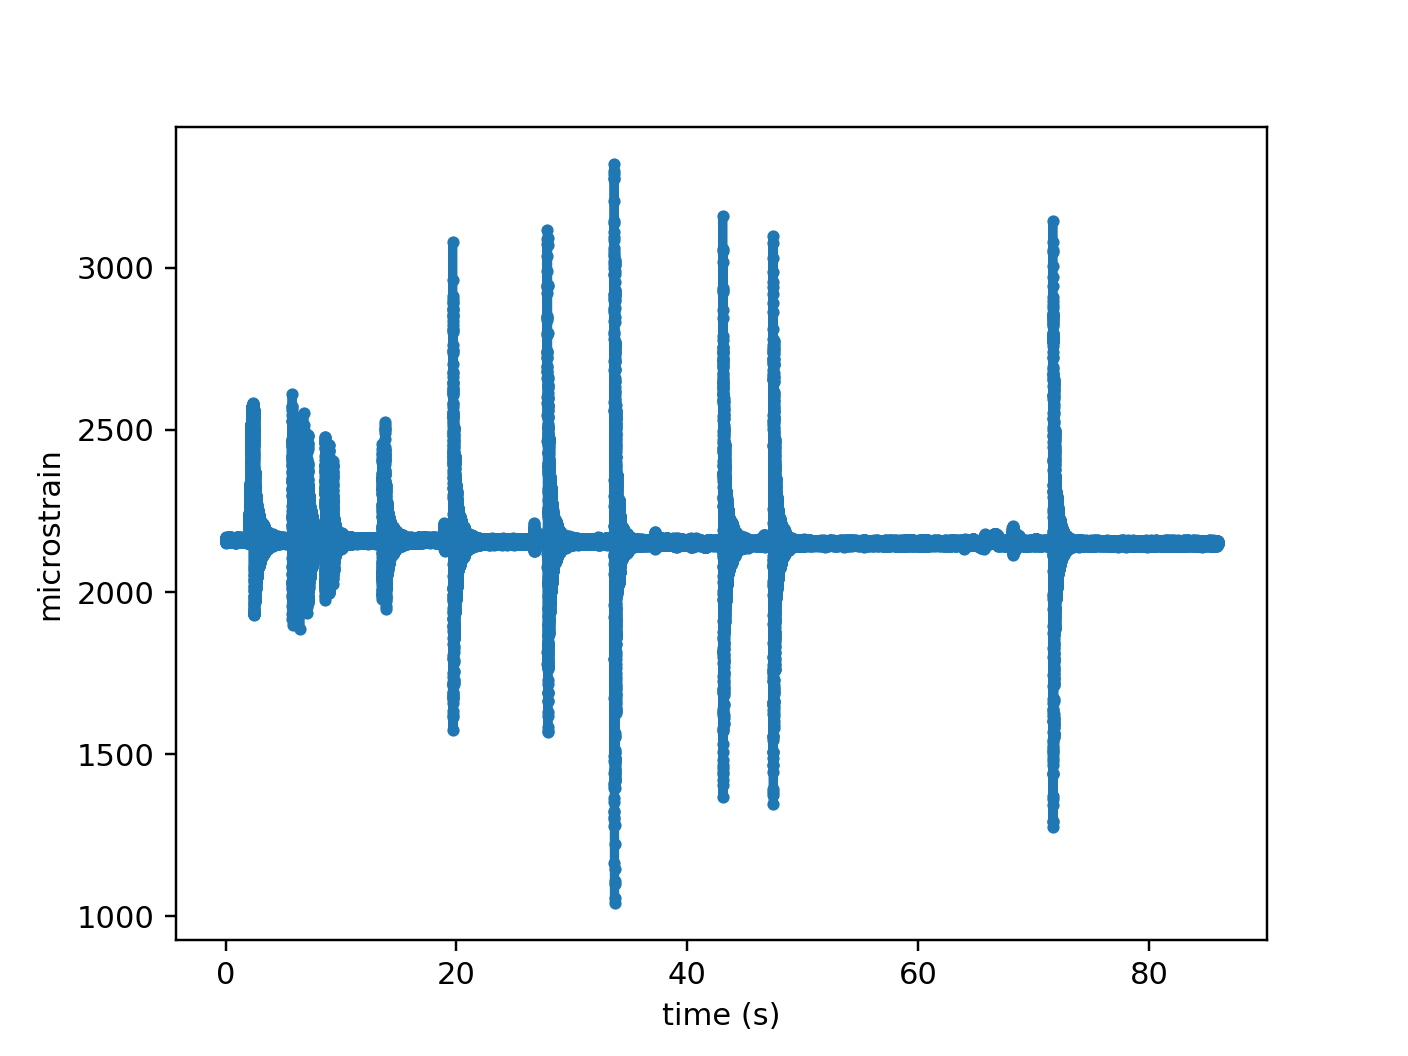

Text(0, 0.5, 'microstrain')

In [11]:
data=np.loadtxt('./steel_700Hz.lvm',delimiter='\t')
t=data[:,0]
y=data[:,1]

plt.figure()
plt.plot(t,y,'.-')
plt.xlabel('time (s)')
plt.ylabel('microstrain')

In the graph above, I zoomed into the region around t=34s. The first natural frequency has the largest amplitude, so you can count the cycles and divide by the time, 

$f_1 = \frac{\#~cycles}{\Delta t}$


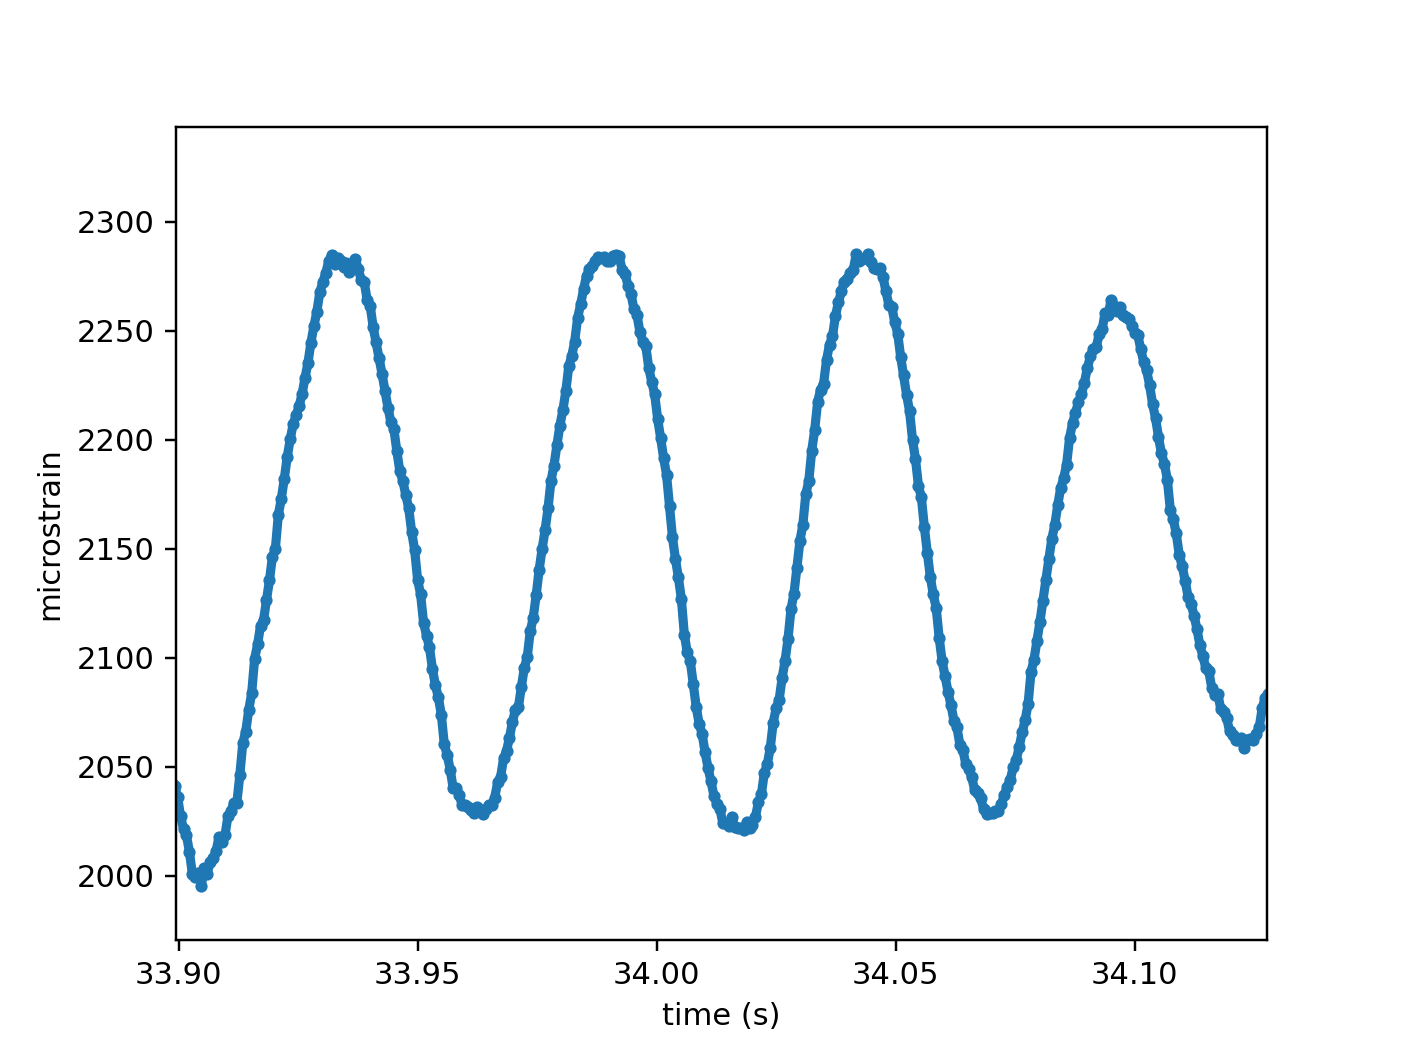

I used the cursor to find peaks at t = 33.99 s, 34.04 s, and 34.10 s. This is two cycles over the course of $\Delta t = 34.1 - 33.99~s.$

The first natural frequency here is $f_1 = \frac{2}{34.1-33.9}=18.2~Hz.$ This is only 3 Hz off from our Euler-Lagrange dynamic beam theory. 

# Part 2 - Using FFT to find natural frequencies

We have already loaded the data as variables, `t` and `y`. Now, we are going to transform the time-axis to a _frequency_ axis and the y-axis will be _amplitude_. If the FFT shows a spike, we know that there is signal in the experiment that is oscillating at that frequency. The first thing to do is remove the __systematic error__ from the strain gage results. We do this by subtracting the average strain measurement from `y`. 

In [12]:
y=y-np.mean(y)

If the average is not 0, then our FFT will have a large spike at $f=0~Hz,$ but it might make our other signals harder to see. Now, we can use our FFT to transform the data, as such

In [13]:
 def FFT(i1, i2, t=t, y=y):  
    '''use the NumPy fft to transform a data set from time-signal -> freq-amplitude
    arguments:
    ----------
    i1: first index in the window
    i2: last index in the window
    t: time values, default is t
    y: signal values, default is y
    output:
    -------
    f: frequency (x-axis in FFT)
    Y: amplitude (y-axis in FFT)
    '''
    ts=t[i1:i2];ys=y[i1:i2]                                                                                        
    Y=2/len(ts)*np.fft.fft(ys)                                                                                     
    f= np.linspace(0,len(ts)/(max(ts)-min(ts)),len(Y))                                                             
    return f,Y

Plot the data again, but don't include the time in the x-values, i.e.

```python
plt.figure()
plt.plot(y)
```

The result, is that `y` is plotted vs the index of the values. For this example, I am choosing a _window_ from i=54300-54500. 

In [14]:
i1=54300
i2=54500

<IPython.core.display.Javascript object>


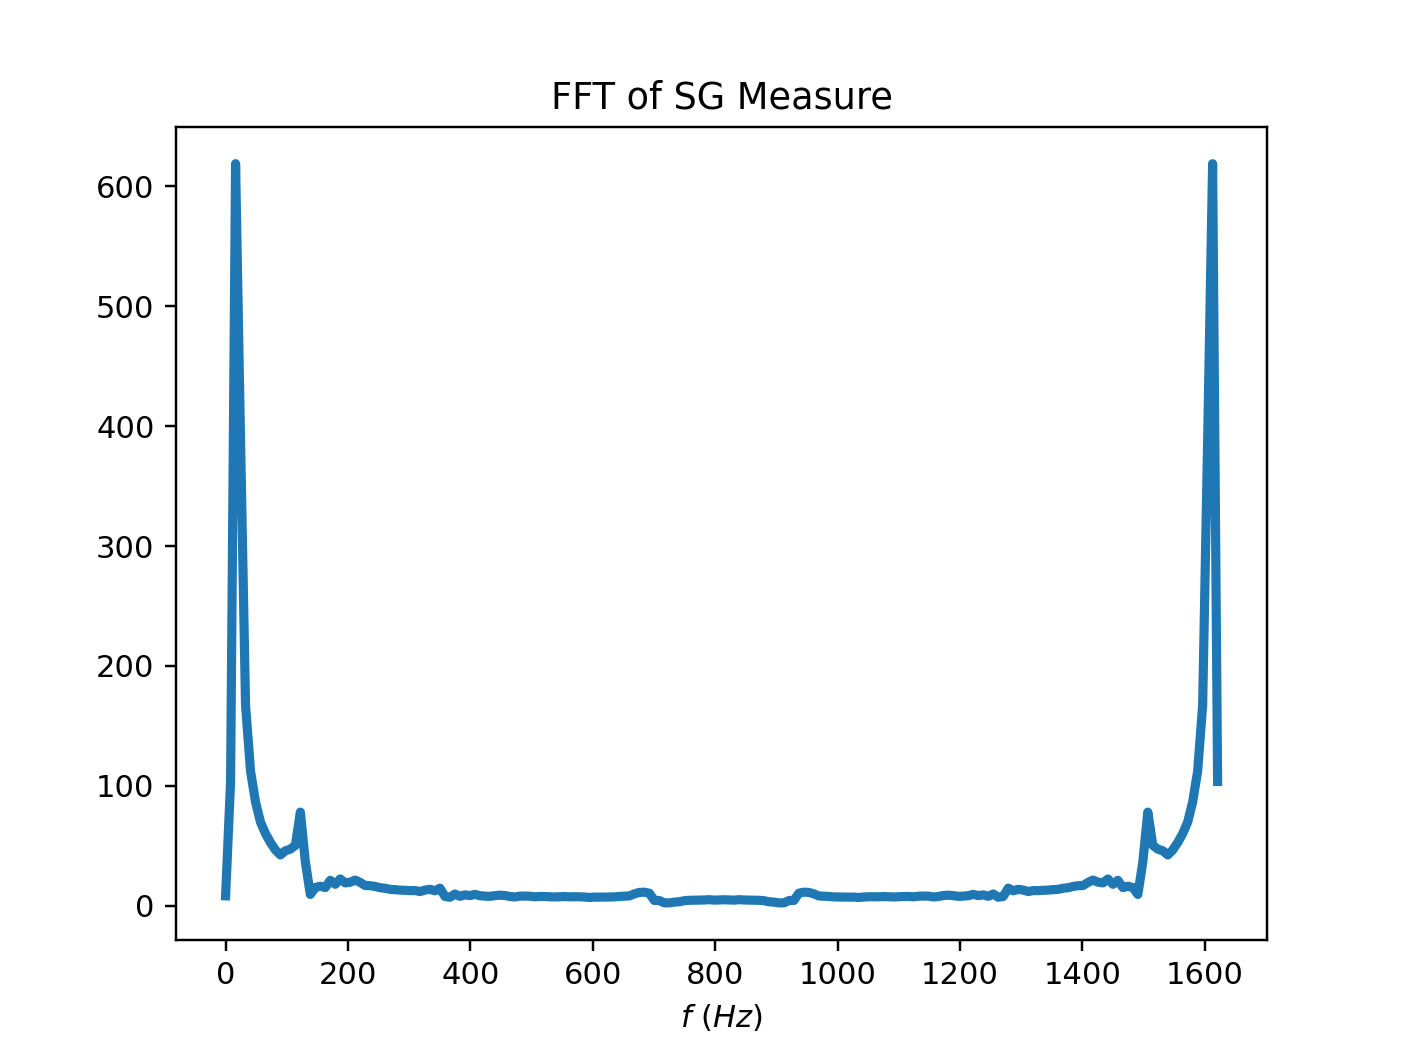

Text(0.5, 0, '$f~(Hz)$')

In [15]:
f,Y = FFT(i1, i2)
plt.figure()
plt.plot(f,abs(Y))
plt.title('FFT of SG Measure')
plt.xlabel(r'$f~(Hz)$')

## Measuring the natural frequencies

What you see above is the amplitude as a function of the frequency. There are spikes at 

* $f_1 = 15.8~Hz,$ $A = 624~microstrain$
* $f_2 = 123.7~Hz,$ $A = 83~microstrain$
* $f_3 = 350~Hz,$ $A = 15~microstrain$

The last natural frequency has the largest error, so it may be a problem with the window or sampling rate. You'll have to play with both to get better measurements of natural frequencies. 

# References

1. [https://en.wikipedia.org/wiki/Euler-Bernoulli_beam_theory](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory#Example:_Cantilevered_beam)

2. Jerri, A. J. (1977). The Shannon sampling theorem—Its various extensions and applications: A tutorial review. Proceedings of the IEEE, 65(11), 1565-1596.

3. Nyquist, H. (1928). Certain topics in telegraph transmission theory. Transactions of the American Institute of Electrical Engineers, 47(2), 617-644.

4. [http://www.onmyphd.com/?p=aliasing](http://www.onmyphd.com/?p=aliasing)

5. Cooley, J. W., & Tukey, J. W. (1965). An algorithm for the machine calculation of complex Fourier series. Mathematics of computation, 19(90), 297-301.

6. Harris, F. J. (1978). On the use of windows for harmonic analysis with the discrete Fourier transform. Proceedings of the IEEE, 66(1), 51-83.